# PROBLEM STATEMENT

The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following: 

- Pclass:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex:    Sex	
- Age:    Age in years	
- Sibsp:	# of siblings / spouses aboard the Titanic	
- Parch:	# of parents / children aboard the Titanic	
- Ticket:	Ticket number	
- Fare:	Passenger fare	
- Cabin:	Cabin number	
- Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


- Target class: Survived: Survival	(0 = No, 1 = Yes)


# DATA SOURCE: https://www.kaggle.com/c/titanic

# LIBRARIES IMPORT

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# IMPORT DATASET

In [2]:
training_set = pd.read_csv('dataset/Train_Titanic.csv')

In [3]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
training_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
training_set.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


# EXPLORE/VISUALIZE DATASET

In [8]:
survived = len(training_set[ training_set['Survived'] == 1 ])
not_survived = len(training_set[ training_set['Survived'] == 0 ])

print('Total = ', len(training_set))
print('Number of passengers who survived = ', survived)
print('Number of passengers who not survived = ', not_survived)
print('% Survived = ', (survived / len(training_set))*100 )
print('% Not Survived = ', (not_survived / len(training_set))*100 )

Total =  891
Number of passengers who survived =  342
Number of passengers who not survived =  549
% Survived =  38.38383838383838
% Not Survived =  61.61616161616161


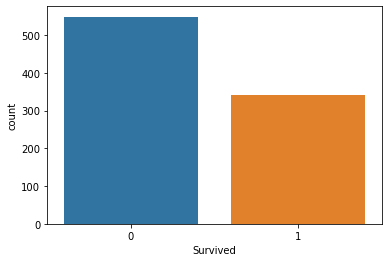

In [9]:
sns.countplot(x = 'Survived', data = training_set)

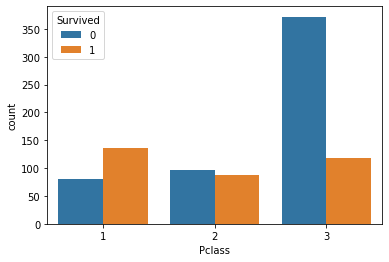

In [10]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = training_set)

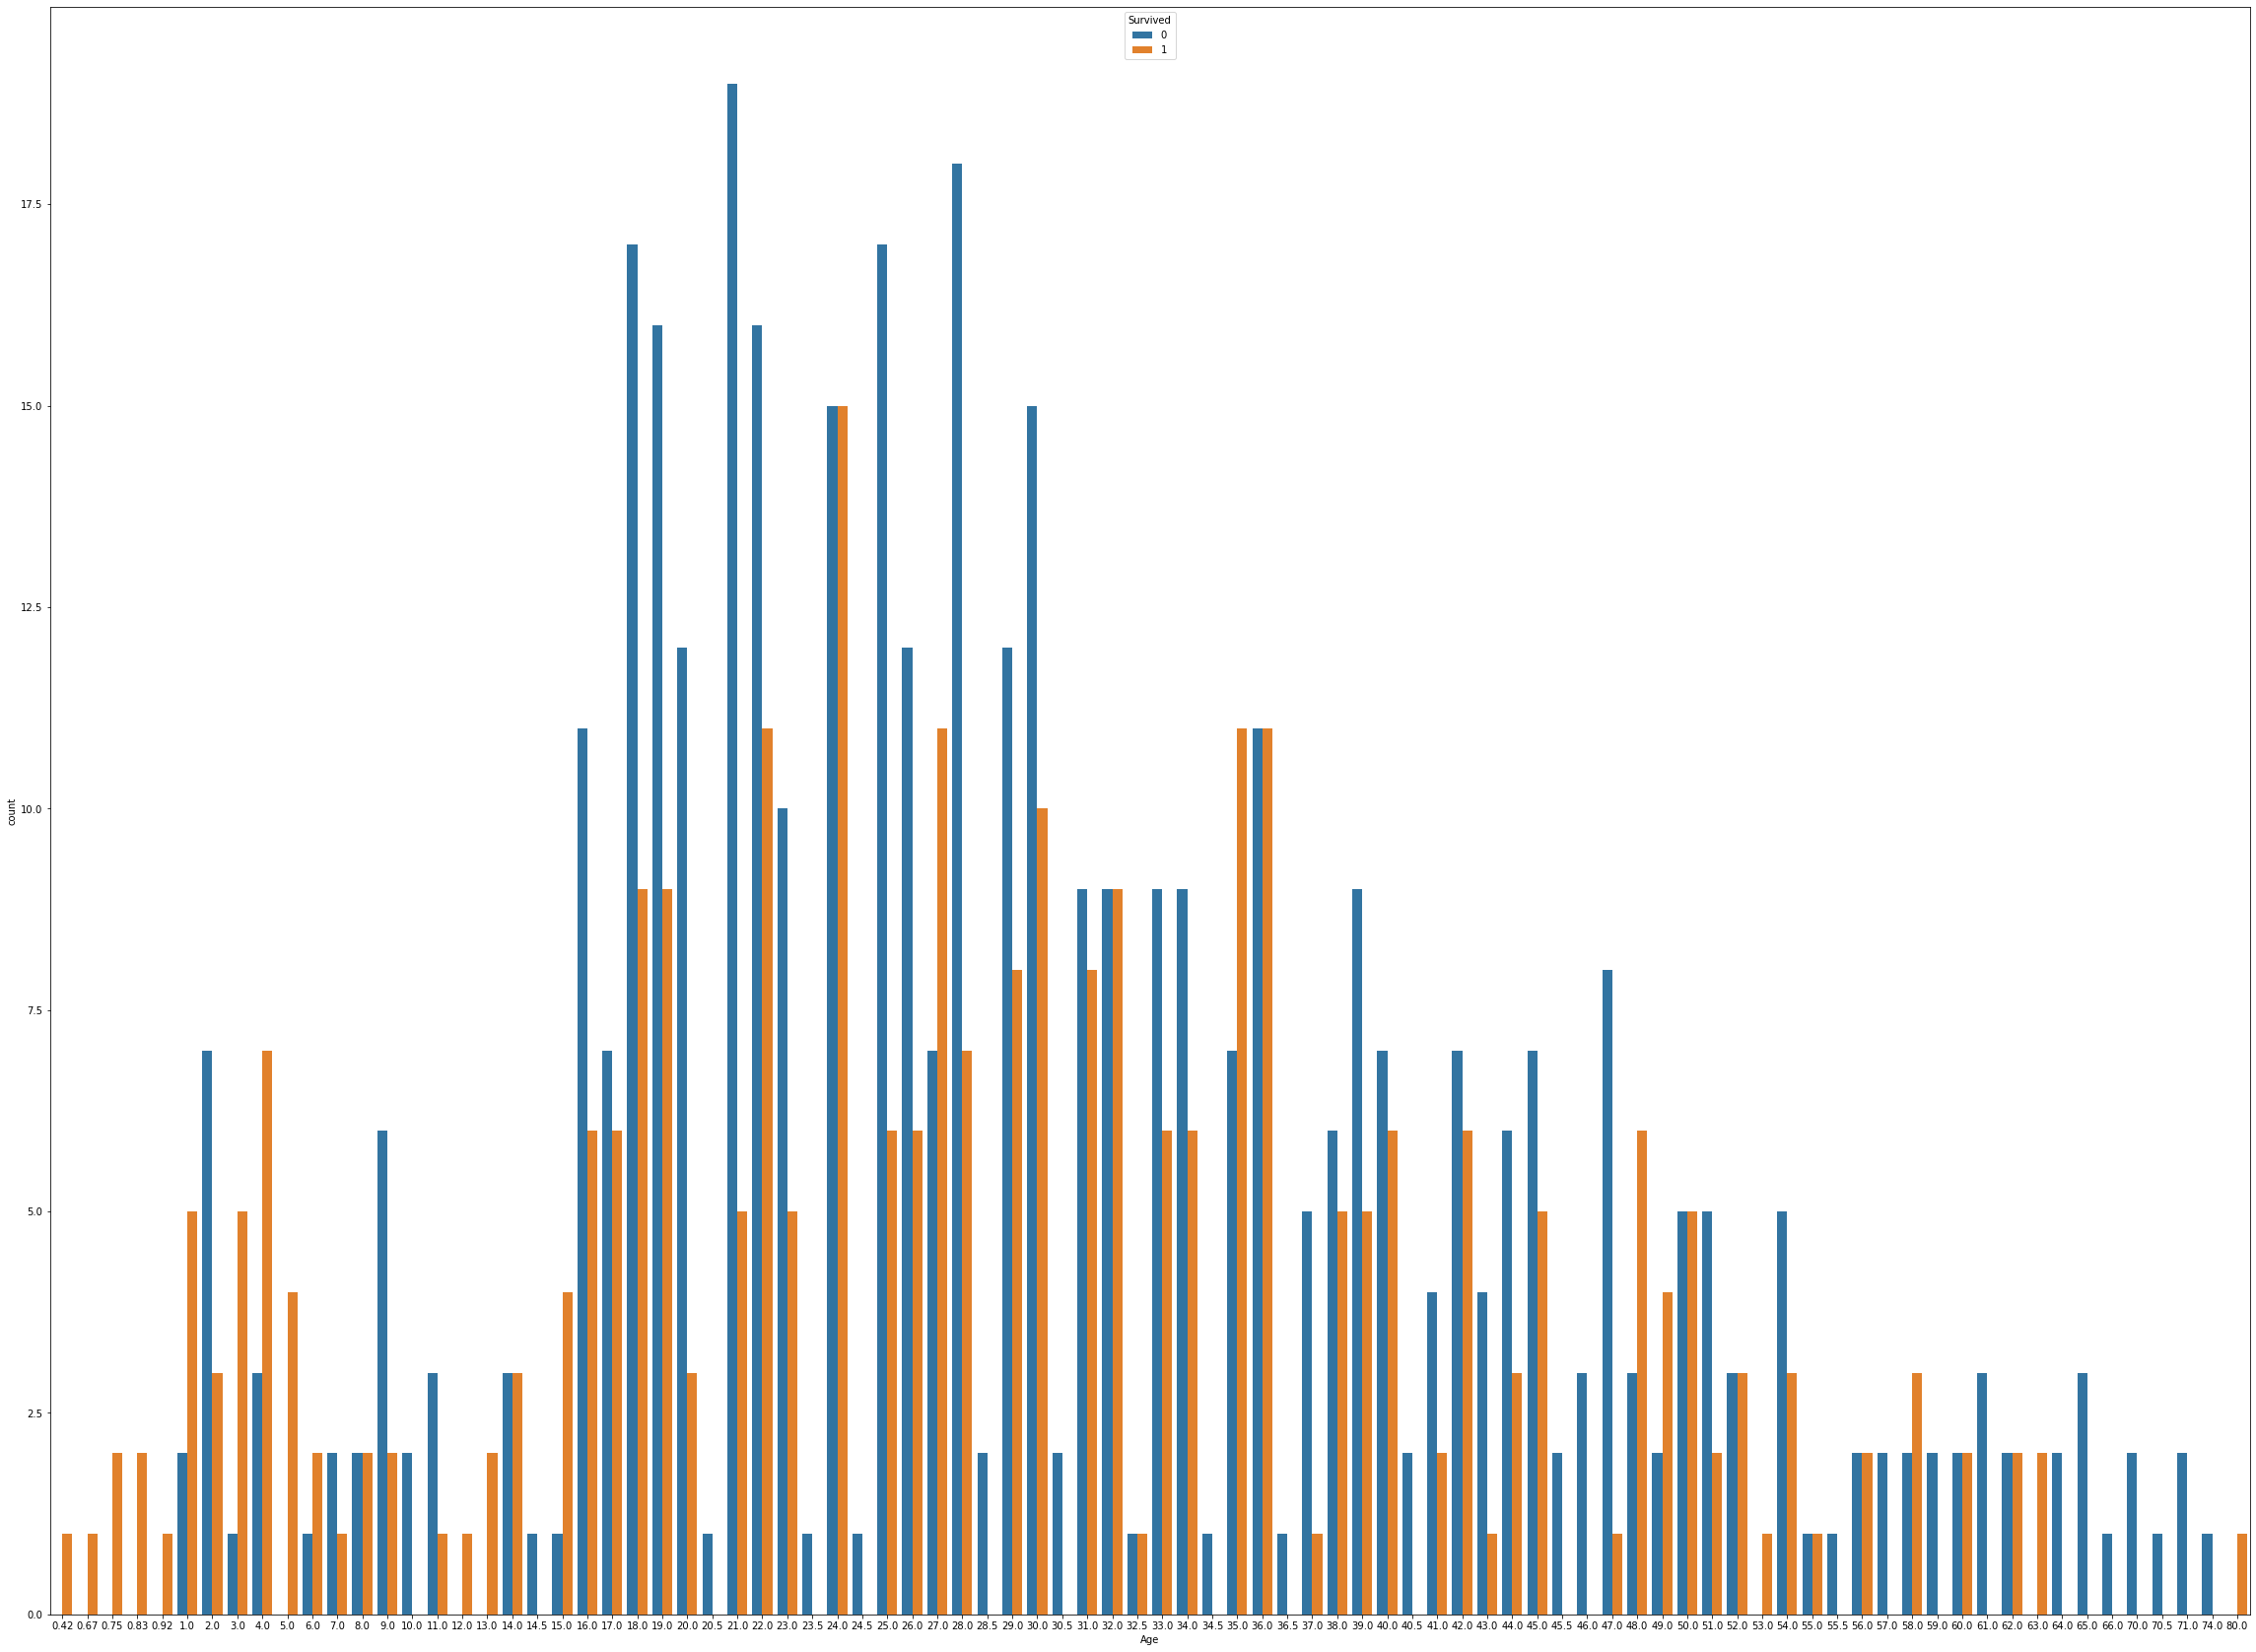

In [11]:
plt.figure(figsize = (40, 30))
sns.countplot(x = 'Age', hue = 'Survived', data = training_set)

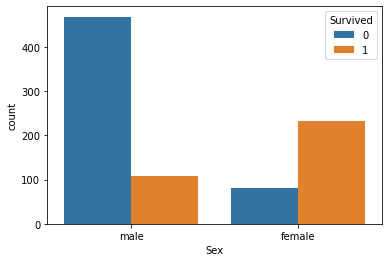

In [12]:
sns.countplot(x = 'Sex', hue = 'Survived', data = training_set)

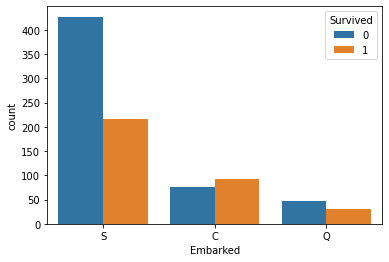

In [13]:
# Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
sns.countplot(x = 'Embarked', hue = 'Survived', data = training_set)

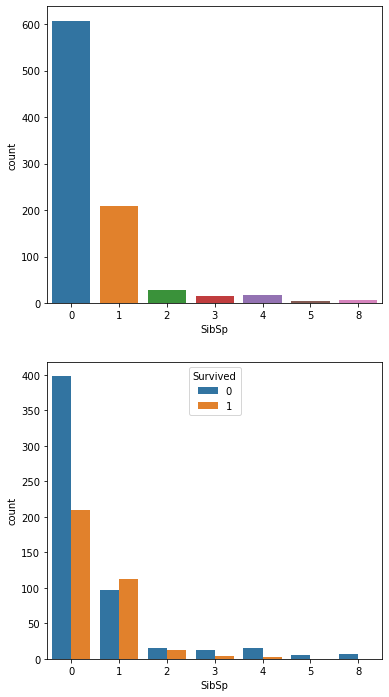

In [14]:
plt.figure(figsize = (6, 12))
plt.subplot(211)
sns.countplot(x = 'SibSp', data = training_set)
plt.subplot(212)
sns.countplot(x = 'SibSp', hue = 'Survived', data = training_set)

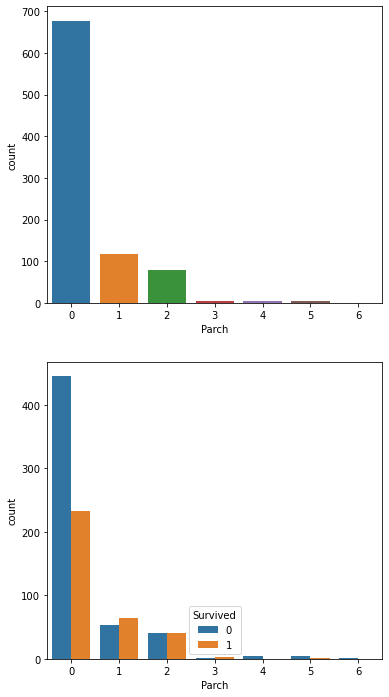

In [15]:
plt.figure(figsize = (6, 12))
plt.subplot(211)
sns.countplot(x = 'Parch', data = training_set)
plt.subplot(212)
sns.countplot(x = 'Parch', hue = 'Survived', data = training_set)

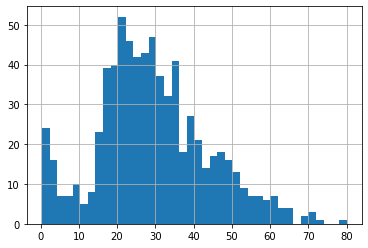

In [16]:
training_set['Age'].hist(bins = 40)

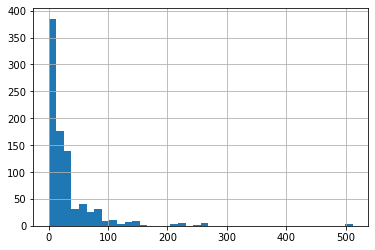

In [17]:
training_set['Fare'].hist(bins = 40)

# PREPARE THE DATA FOR TRAINING/ DATA CLEANING

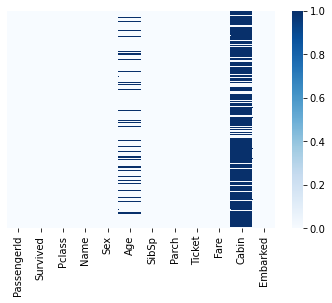

In [18]:
sns.heatmap(training_set.isnull(), yticklabels = False, cmap = 'Blues')

In [19]:
training_set.drop(['Cabin', 'Name', 'Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace = True)

In [20]:
training_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [21]:
age_mean = int(training_set['Age'].mean())

def fill_age(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age) or pd.isna(age):
        return (int(np.random.randn()*5) + age_mean)
    else:
        return age
    
training_set['Age'] = training_set[['Age','Sex']].apply(fill_age, axis = 1)

In [22]:
training_set.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

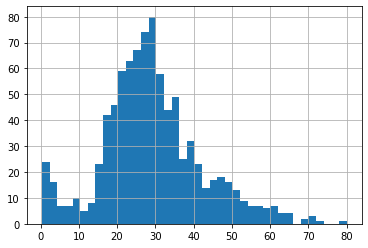

In [23]:
training_set['Age'].hist(bins = 40)

In [24]:
male = pd.get_dummies(data = training_set['Sex'], drop_first = True)
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [25]:
training_set.drop(['Sex'], axis = 1, inplace = True)

In [26]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,32.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [27]:
training_set = pd.concat([training_set, male], axis = 1)

print(training_set)
print(training_set.info())

     Survived  Pclass   Age  SibSp  Parch     Fare  male
0           0       3  22.0      1      0   7.2500     1
1           1       1  38.0      1      0  71.2833     0
2           1       3  26.0      0      0   7.9250     0
3           1       1  35.0      1      0  53.1000     0
4           0       3  35.0      0      0   8.0500     1
..        ...     ...   ...    ...    ...      ...   ...
886         0       2  27.0      0      0  13.0000     1
887         1       1  19.0      0      0  30.0000     0
888         0       3  32.0      1      2  23.4500     0
889         1       1  26.0      0      0  30.0000     1
890         0       3  32.0      0      0   7.7500     1

[891 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    f

# MODEL TRAINING

In [28]:
X = training_set.drop(['Survived'], axis = 1).values
y = training_set['Survived'].values

print(X.shape, y.shape)

(891, 6) (891,)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [31]:
classifier = LogisticRegression(random_state=10)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=10)

# MODEL TESTING by splitted train_set

In [32]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0])

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Survived:0','Survived:1'])
print(conf_matrix)

[[102  15]
 [ 18  44]]
            Predicted:0  Predicted:1
Survived:0          102           15
Survived:1           18           44


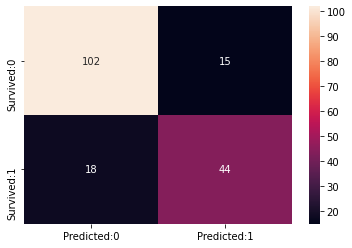

In [35]:
sns.heatmap(conf_matrix, annot = True, fmt='d')

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       117
           1       0.75      0.71      0.73        62

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.82      0.81       179



# MODEL TESTING by splitted test_set

In [37]:
test_set = pd.read_csv('dataset/Test_Titanic.csv')

In [38]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
test_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [40]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [41]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [42]:
test_set.drop(['Cabin', 'Name', 'Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace = True)

In [43]:
age_mean = int(test_set['Age'].mean())
test_set['Age'] = test_set[['Age','Sex']].apply(fill_age, axis = 1)

test_set['Age'].hist(bins = 40)

In [44]:
male = pd.get_dummies(data = test_set['Sex'], drop_first = True)
test_set.drop(['Sex'], axis = 1, inplace = True)
test_set = pd.concat([test_set, male], axis = 1)

print(test_set)
print(test_set.info())

     Pclass   Age  SibSp  Parch      Fare  male
0         3  34.5      0      0    7.8292     1
1         3  47.0      1      0    7.0000     0
2         2  62.0      0      0    9.6875     1
3         3  27.0      0      0    8.6625     1
4         3  22.0      1      1   12.2875     0
..      ...   ...    ...    ...       ...   ...
413       3  32.0      0      0    8.0500     1
414       1  39.0      0      0  108.9000     0
415       3  38.5      0      0    7.2500     1
416       3  34.0      0      0    8.0500     1
417       3  26.0      1      1   22.3583     1

[418 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    417 non-null    float64
 5   male    418 non-null    uint8  


In [45]:
test_set.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      1
male      0
dtype: int64

In [49]:
test_set.dropna(axis=0, inplace = True)
print(test_set.isnull().sum())
print(test_set.info())

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  417 non-null    int64  
 1   Age     417 non-null    float64
 2   SibSp   417 non-null    int64  
 3   Parch   417 non-null    int64  
 4   Fare    417 non-null    float64
 5   male    417 non-null    uint8  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 20.0 KB
None


In [51]:
X_test_pred = test_set.values
print(X_test_pred)

[[ 3.     34.5     0.      0.      7.8292  1.    ]
 [ 3.     47.      1.      0.      7.      0.    ]
 [ 2.     62.      0.      0.      9.6875  1.    ]
 ...
 [ 3.     38.5     0.      0.      7.25    1.    ]
 [ 3.     34.      0.      0.      8.05    1.    ]
 [ 3.     26.      1.      1.     22.3583  1.    ]]


In [53]:
y_pred_test = classifier.predict(X_test_pred)
print(y_pred_test)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 1 1 1 1 0 1 0 0 0]
